---
title: "IDS Writing Assignment"
format: html
execute:
  echo: false
---

<!-- ## 📑 Index

- [Test-1](#test-1)
-  -->


<style>
body {
  background-color: white; /* light blue background */
  font-family: "Segoe UI", sans-serif;
}

h1, h2, h3 {
  color: #333;
}

code {
  background-color: #e6e6e6;
  padding: 2px 4px;
  border-radius: 4px;
}
</style>


---
author: Shreyas Dharmatti, Kanika Dixit
date: 14 April, 2025
---

In [ ]:
#echo: false
#installing required libraries
!pip install bar_chart_race  mplcursors --q

In [40]:
#Importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # hide all the warnings in the output
import plotly.express as px
import seaborn as sns
import bar_chart_race as bcr
import pandas as pd
import plotly.graph_objects as go
import mplcursors
import plotly.io as pio
pio.renderers.default = "iframe_connected"

The dataset contains electricity usage data for various Indian states, recorded across different dates. Each row represents a state's usage at a specific timestamp, along with its geographical coordinates (latitude and longitude) and its corresponding region (like NR for North Region). The dataset includes 16,599 entries across 6 columns. The Usage column holds the power consumption values, while the Dates column indicates the timestamp in DD/MM/YYYY HH:MM:SS format.

Data is in the form of a time series for a period of 17 months beginning from 2nd Jan 2019 till 23rd May 2020. 

Below is the first 10 samples from the dataset.

In [ ]:

df_l=pd.read_csv("long_data_.csv")
df_l.head(10)

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9
5,Uttarakhand,NR,30.320409,78.050006,02/01/2019 00:00:00,40.7
6,HP,NR,31.100025,77.166597,02/01/2019 00:00:00,30.0
7,J&K,NR,33.450000,76.240000,02/01/2019 00:00:00,52.5
8,Chandigarh,NR,30.719997,76.780006,02/01/2019 00:00:00,5.0
9,Chhattisgarh,WR,22.090420,82.159987,02/01/2019 00:00:00,78.7


In [14]:
# Cheking missing values
print("Number of Null Values in these columns:\n")
df_l.isnull().sum()

Number of Null Values in these columns:



States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64

In [16]:
# removing duplicate values 
df_final = df_l.drop_duplicates()


### Univariate Analysis

Lets look at data distribution across all the 33 states present in the dataset

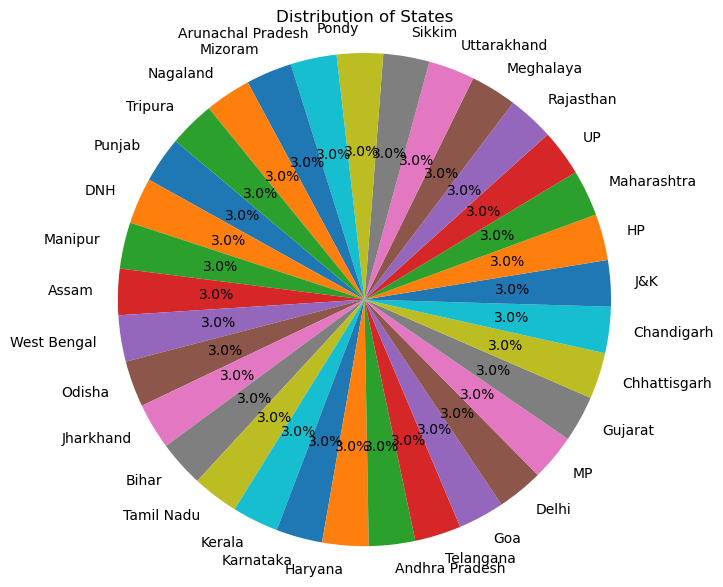

In [17]:
# States
state_counts = df_final["States"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of States')
plt.axis('equal')  
plt.show()

Now, lets look at the data distribution across the 5 regions

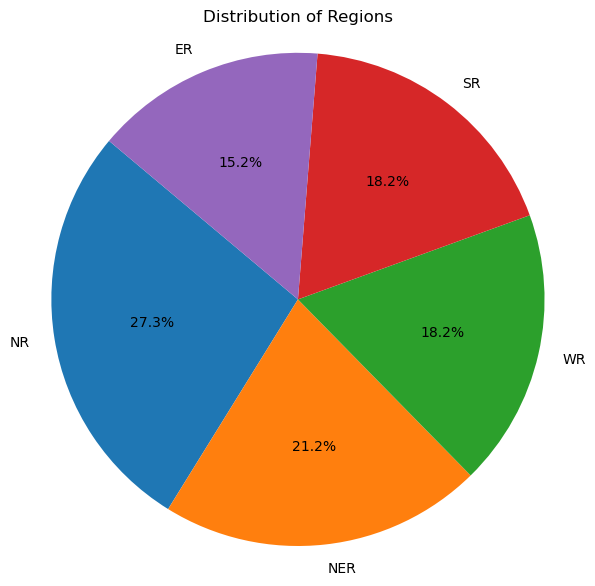

In [18]:
# Regions
region_counts = df_final["Regions"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Regions')
plt.axis('equal')  # Ensures the pie is drawn as a circle
plt.show()

Now lets focus on how many states are present in each region

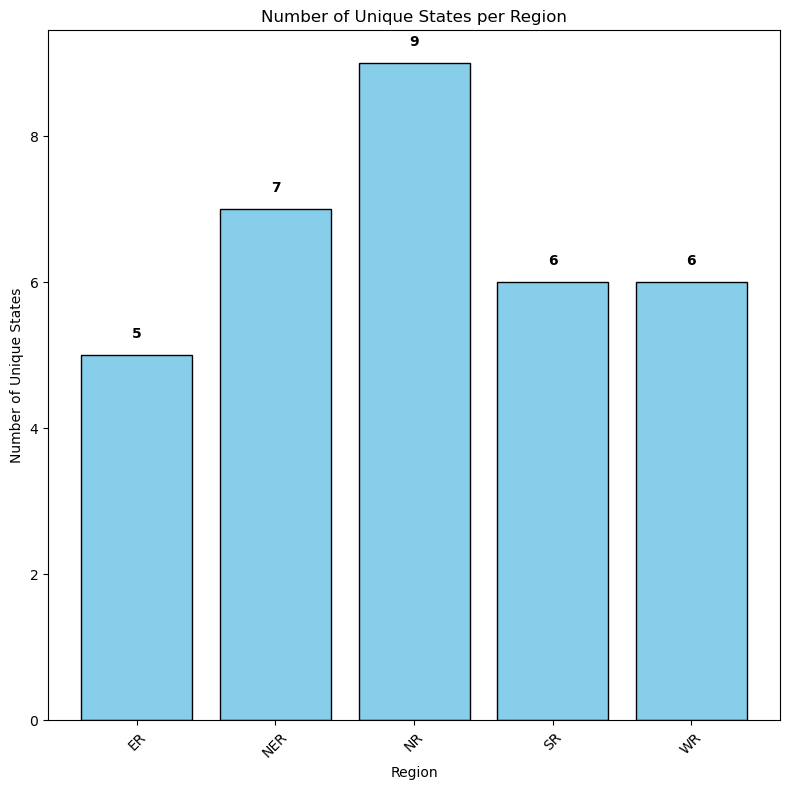

In [21]:
# Group and count unique states per region
state_region_counts = df_final.groupby("Regions")["States"].nunique()

# Plotting the bar chart
plt.figure(figsize=(8, 8))
bars = plt.bar(state_region_counts.index, state_region_counts.values, color='skyblue', edgecolor='black')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Number of Unique States per Region')
plt.xlabel('Region')
plt.ylabel('Number of Unique States')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Following are stats for the **Usage** columns in the dataset

In [22]:
# Usage Column
df_final['Usage'].describe()

count    16587.000000
mean       103.072539
std        116.056017
min          0.300000
25%          6.700000
50%         64.600000
75%        174.000000
max        522.100000
Name: Usage, dtype: float64

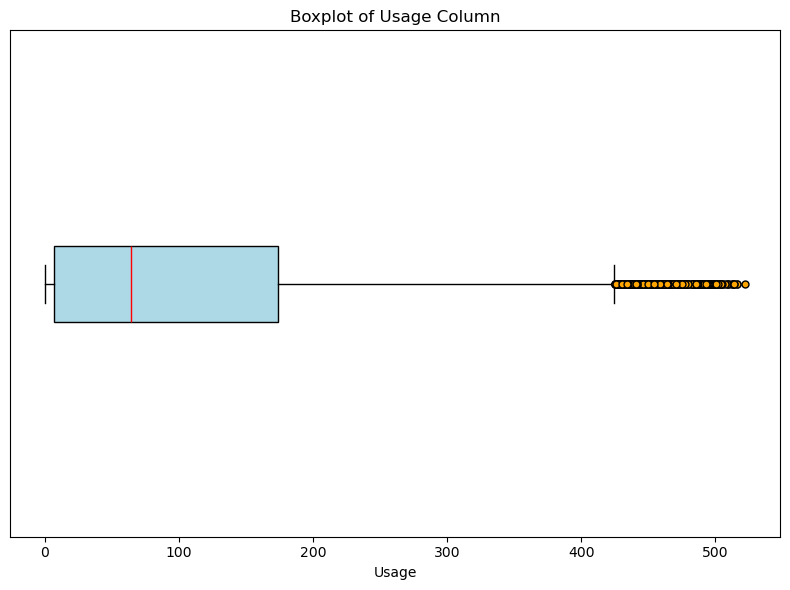

In [28]:
# Describe statistics
usage_stats = df_final['Usage'].describe()

# Plotting boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(df_final['Usage'], vert=False, patch_artist=True,
                  boxprops=dict(facecolor='lightblue', color='black'),
                  medianprops=dict(color='red'),
                  whiskerprops=dict(color='black'),
                  capprops=dict(color='black'),
                  flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, linestyle='none'))

# Title and labels
plt.title('Boxplot of Usage Column')
plt.xlabel('Usage')
plt.yticks([])  # Hide y-axis ticks
plt.tight_layout()
plt.show()


Here is the date distribution which the dataset follows, important note here is that not all days are included in the time period mentioned, there are some days for which no data is logged

In [31]:
# Dates column
df_final['Dates'] = pd.to_datetime(df_final['Dates'], format="%d/%m/%Y %H:%M:%S")

# Get min and max dates
start_date = df_final['Dates'].min()
end_date = df_final['Dates'].max()

# Calculate duration
duration = end_date - start_date

# Display
print(f"Data start date: {start_date}")
print(f"Data ends end: {end_date}")
print(f"Total days for which data is logged: {duration}")


Data start date: 2019-01-02 00:00:00
Data ends end: 2020-12-05 00:00:00
Total days for which data is logged: 703 days 00:00:00


### Bivariate Analysis

Now lets focus on average usage according to regions

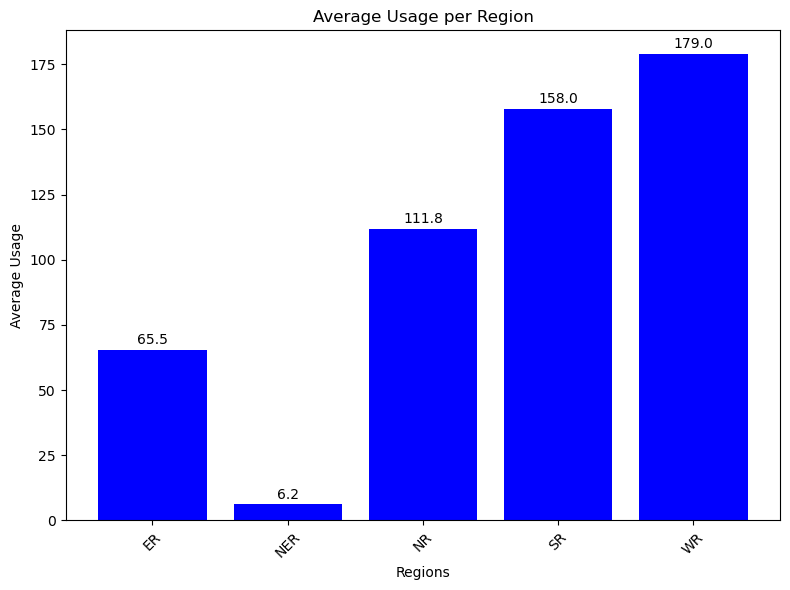

In [32]:
# Calculate mean Usage per Region
region_usage_mean = df_final.groupby('Regions')['Usage'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(region_usage_mean.index, region_usage_mean.values, color='blue')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}', ha='center', va='bottom')

# Labeling
plt.xlabel('Regions')
plt.ylabel('Average Usage')
plt.title('Average Usage per Region')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



Next, we will see on average power usage for each state

In [33]:
# Mean Usage per state

mean_usage_per_state = df_final.groupby('States')['Usage'].mean().sort_values(ascending=False)
mean_usage_per_state

States
Maharashtra          431.570179
Gujarat              323.039563
UP                   314.036382
Tamil Nadu           300.738569
Rajasthan            218.443340
MP                   208.283101
Karnataka            204.106759
Telangana            187.008549
Andhra Pradesh       176.151889
Punjab               141.145527
West Bengal          138.708151
Haryana              138.333598
Chhattisgarh          83.877137
Delhi                 83.380716
Bihar                 83.159443
Odisha                80.464612
Kerala                72.192445
J&K                   44.264016
Uttarakhand           36.161155
HP                    26.568191
Assam                 24.960040
Jharkhand             23.842545
DNH                   16.430616
Goa                   11.093241
Pondy                  7.473108
Meghalaya              5.646813
Chandigarh             4.141551
Tripura                4.089022
Manipur                2.494632
Nagaland               2.163273
Arunachal Pradesh      2.110579
M

Lets look at the mean usage of each state with thier locations on the map

In [42]:
df_mean_usage = df_final.groupby('States').agg({'Usage': 'mean', 'latitude': 'mean', 'longitude': 'mean'}).reset_index()
fig = px.scatter_geo(df_mean_usage,
                     lat='latitude', 
                     lon='longitude', 
                     color='Usage', 
                     hover_name='States')  # You can choose any color scale
fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100])
fig.show()

Let focus on top 10 states which consume maximum energy

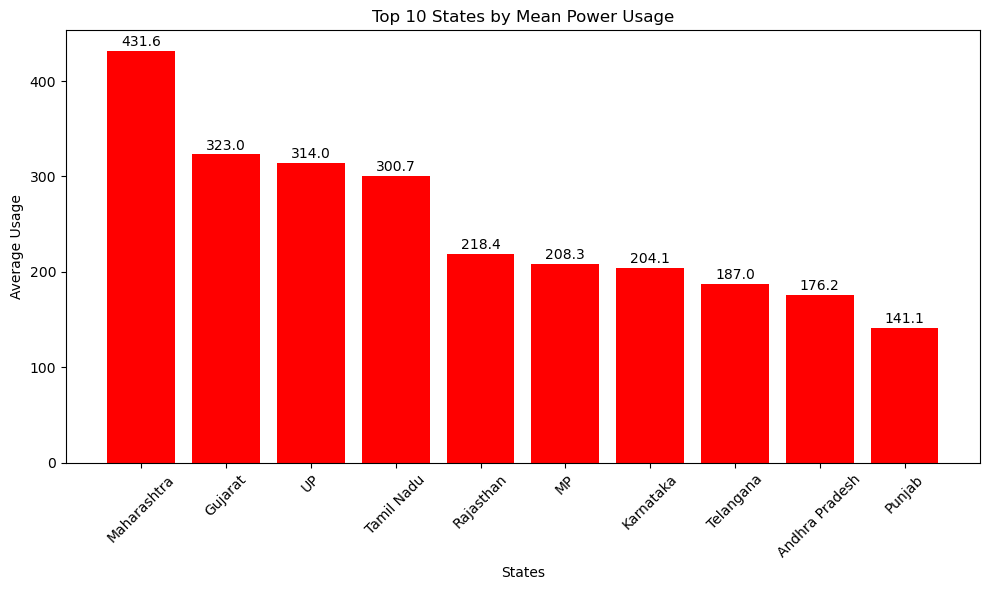

In [35]:
# Top 10 states with maximum usage
top10_states = mean_usage_per_state.head(10)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(top10_states.index, top10_states.values, color='red')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.1f}', ha='center', va='bottom')

# Labeling
plt.xlabel('States')
plt.ylabel('Average Usage')
plt.title('Top 10 States by Mean Power Usage')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



Now lets look at India as a whole and see how the mean usage varied throughtout the entire period

<Axes: xlabel='Dates'>

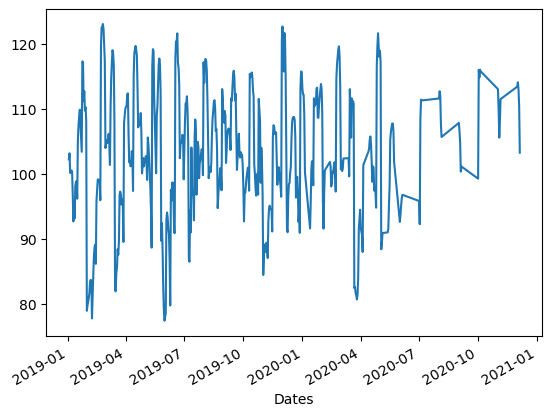

In [ ]:
# Usage w.r.t date

df_final.groupby('Dates')['Usage'].mean().plot()


In [39]:
# Convert 'Dates' column to datetime
df_final['Dates'] = pd.to_datetime(df_final['Dates'])

# Extract Year-Month
df_final['Year-Month'] = df_final['Dates'].dt.to_period('M').astype(str)

# Group by 'Year-Month' and calculate mean usage
monthly_usage = df_final.groupby('Year-Month')['Usage'].mean().reset_index()

# Plot interactive line chart
fig = px.line(monthly_usage, x='Year-Month', y='Usage', 
              title='Mean Usage per Month',
              labels={'Usage': 'Mean Usage', 'Year-Month': 'Month'},
              markers=True)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Mean Usage',
    xaxis_tickangle=-45
)

fig.show()


Lets now look at the correlation matrix for usage latitude and longitude

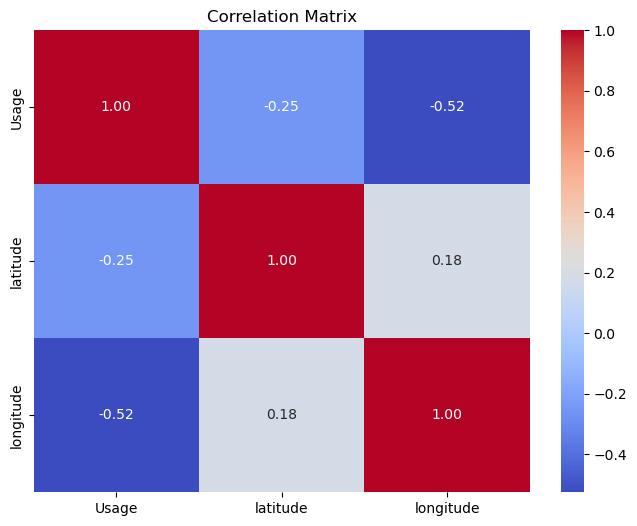

In [43]:
# Usage w.r.t longitude and latitude 
numeric_cols = ['Usage', 'latitude', 'longitude']
plt.figure(figsize=(8, 6))
corr_matrix = df_final[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Now let us look at if there are any outliers present in the usage column, and if then in which states

In [44]:
# Outlier values w.r.t states

# Using IQR method again
Q1 = df_final['Usage'].quantile(0.25)
Q3 = df_final['Usage'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df_final[(df_final['Usage'] < lower) | (df_final['Usage'] > upper)]
print(outliers[['States', 'Usage']].sort_values('Usage', ascending=False))
outlier_states = outliers['States'].unique()
print(outlier_states)



            States  Usage
5424   Maharashtra  522.1
1662   Maharashtra  516.4
1695   Maharashtra  515.8
5391   Maharashtra  513.9
5358   Maharashtra  513.6
...            ...    ...
15679           UP  425.6
3873   Maharashtra  425.5
13575  Maharashtra  425.1
7066            UP  425.1
6744   Maharashtra  425.1

[314 rows x 2 columns]
['Maharashtra' 'UP']


From the above analysis we can cleary see that there exist around 314 outliers, but the interesting point is that they exist only in Maharashtra and UP, and the outlier values are high. this can due to fact that the population is very high in both these states, thus having high values of usage is quite justified compared to the other values

In [ ]:
df = pd.read_csv('long_data_.csv')
df_final['Dates'] = pd.to_datetime(df_final['Dates'], format="%d/%m/%Y %H:%M:%S")

df_final['Month'] = df_final['Dates'].dt.to_period('M').astype(str)

# Group by 'States' and 'Month' and calculate mean 'Usage'
state_month_usage = df_final.groupby(['States', 'Month'])['Usage'].mean().reset_index()

# Sort values for readability
state_month_usage = state_month_usage.sort_values(by=['States', 'Month'])

# Display summary statistics of the monthly average Usage
usage_stats = state_month_usage['Usage'].describe()
print("Monthly Usage Statistics (Grouped by State and Month):\n")
print(usage_stats)

Monthly Usage Statistics (Grouped by State and Month):

count    792.000000
mean     103.845091
std      115.037608
min        1.031818
25%        7.216190
50%       70.458333
75%      176.917403
max      488.940000
Name: Usage, dtype: float64


In [ ]:


state_month_usage['Month'] = pd.to_datetime(state_month_usage['Month'])

df_race = state_month_usage.pivot(index='Month', columns='States', values='Usage')

df_race = df_race.sort_index()

# Run bar chart race
bcr.bar_chart_race(
    df=df_race,
    filename=None,  
    orientation='h',
    sort='desc',
    n_bars=33,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=40,
    interpolate_period=True,
    label_bars=True,
    period_length=2000,
    period_fmt='%b %Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .2,
                                      's': f'Total Usage: {int(v.sum())}',
                                      'ha': 'right', 'size': 8},
    perpendicular_bar_func=None,
    figsize=(5, 4),
    dpi=144,
    cmap='dark24',
    title='Monthly Power Usage(Mean) by Indian States',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family': 'Courier New', 'color': '.1'},
    scale='linear',
    bar_kwargs={'alpha': .7},
    filter_column_colors=True
)

In [ ]:

# Ensure 'Dates' is in datetime format
df_final['Dates'] = pd.to_datetime(df_final['Dates'], format="%d/%m/%Y %H:%M:%S")

# Create figure
fig = go.Figure()
states = df_final['States'].unique()

# Add traces (initially hidden but visible in legend)
for state in states:
    state_data = df_final[df_final['States'] == state]
    fig.add_trace(go.Scatter(
        x=state_data['Dates'],
        y=state_data['Usage'],
        mode='lines',
        name=state,
        visible='legendonly'
    ))

# Create visibility lists
all_visible = [True] * len(states)
all_legendonly = ['legendonly'] * len(states)

# Add buttons
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=[
                dict(label="Select All",
                     method="update",
                     args=[{"visible": all_visible}]),
                dict(label="Deselect All",
                     method="update",
                     args=[{"visible": all_legendonly}])
            ],
            pad={"r": 10, "t": 10},
            showactive=False,
            x=0.5,
            xanchor="center",
            y=1.15,
            yanchor="top"
        )
    ],
    title='Power Usage Over Time by State',
    xaxis_title='Date',
    yaxis_title='Power Usage',
    legend_title='State',
    hovermode='x unified'
)

fig.show()


In [ ]:
# Define cutoff date
cutoff_date = pd.Timestamp('2020-01-01')

# Count entries before and after the cutoff date
before_count = df_final[df_final['Dates'] < cutoff_date].shape[0]
after_count = df_final[df_final['Dates'] >= cutoff_date].shape[0]

print(f"Entries before 1 Jan 2020: {before_count}")
print(f"Entries on or after 1 Jan 2020: {after_count}")


In [ ]:



# Convert 'year month' column to datetime (assuming format 'YYYY-MM')
df_final['Year-Month'] = pd.to_datetime(df_final['Year-Month'], format='%Y-%m')

# Define lockdown date
lockdown_date = pd.Timestamp('2020-03-25')

# Split data before and after lockdown
before_lockdown = df_final[df_final['Dates'] < lockdown_date]
after_lockdown = df_final[df_final['Dates'] >= lockdown_date]

# Group by 'year month' and calculate total usage
before_agg = before_lockdown.groupby('Year-Month')['Usage'].mean()
after_agg = after_lockdown.groupby('Year-Month')['Usage'].mean()

# Plotting
plt.figure(figsize=(14, 6))
line1, = plt.plot(before_agg.index, before_agg.values, label='Before Lockdown', color='skyblue', marker='o')
line2, = plt.plot(after_agg.index, after_agg.values, label='After Lockdown', color='salmon', marker='o')

# Mark lockdown date
plt.axvline(pd.Timestamp('2020-03'), color='black', linestyle='--', linewidth=2, label='Lockdown Start')

# Format x-axis to show month names
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Labels and styling
plt.title("Electricity Usage Before and After COVID Lockdown (India)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Monthly Usage", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Make the plot interactive for data points
mplcursors.cursor([line1, line2], hover=True).connect("add", lambda sel: sel.annotation.set_text(f"{sel.target[0]:.2f}, {sel.target[1]:.2f}"))

# Show plot
plt.show()


In [ ]:

states = state_month_usage['States'].unique()

# Create the figure
fig = go.Figure()

# Add a bar trace for each state (only first state is visible initially)
for i, state in enumerate(states):
    state_data = state_month_usage[state_month_usage['States'] == state]
    fig.add_trace(go.Bar(
        x=state_data['Month'],
        y=state_data['Usage'],
        name=state,
        visible=(i == 0)  # Only show the first state initially
    ))

# Add dropdown to toggle visibility
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": state,
                    "method": "update",
                    "args": [
                        {"visible": [i == j for j in range(len(states))]},
                        {"title": f"Monthly Usage for {state}"}
                    ],
                } for i, state in enumerate(states)
            ],
            "direction": "down",
            "showactive": True,
            "x": 1.1,
            "xanchor": "left",
            "y": 1.15,
            "yanchor": "top"
        }
    ],
    title=f"Monthly Usage for {states[0]}",
    xaxis_title="Months",
    yaxis_title="Average Usage in Mega Units(MU)",
    height=500
)

fig.show()

----------

**Next we try to see the seasonal variation in usage in India using the ANOVA Test**

Objective
The goal of this analysis is to determine if there is a **statistically significant difference**
in electricity usage across different seasons in India.

In here we are assuming the four seasons, as it is widely well known in India:

**Winter**: Decemeber, January, February

**Summer**: March, April, May

**Monsoon**: June, July, August

**Post-Monsoon**: September, October, Novemeber.

This is a generalisation of seasons, of course there are places in India, wherein, maybe the mentioned seasonal variation is not followed, but as a whole for India, this is a good way to divide the seasons.

We will be testing the following hypotheses using **One-Way ANOVA**:

**Null Hypothesis (H₀)**: Mean electricity usage is the same across all seasons.

**Alternative Hypothesis (H₁)**: At least one season has a different mean electricity usage.

*(We would be using a p-value of 0.05)*


ANOVA Test Result:
F-statistic: 0.1816
p-value: 0.9090


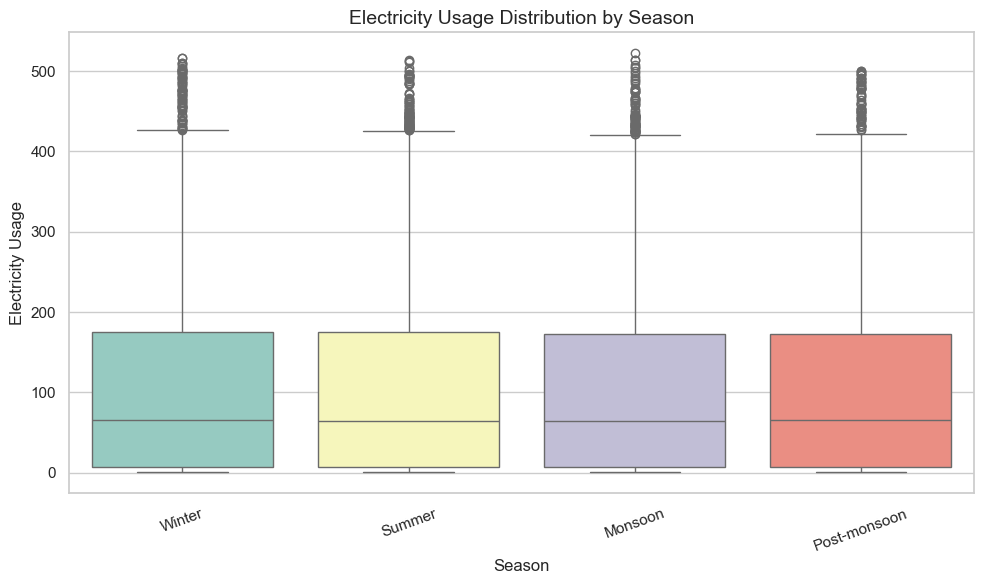

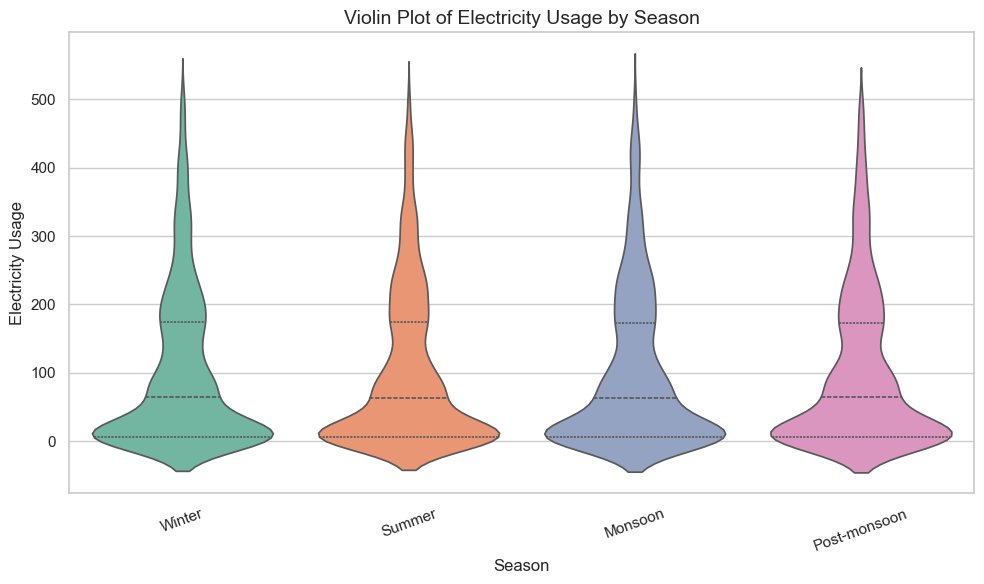

In [ ]:
#test-1
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("long_data_.csv")

df['Dates'] = pd.to_datetime(df['Dates'], format="%d/%m/%Y %H:%M:%S")

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-monsoon'

# Step 3: Create a Season column
df['Season'] = df['Dates'].dt.month.map(get_season)

# Step 4: Group Usage values by season
season_groups = df.groupby('Season')['Usage'].apply(list)

# Step 5: Perform one-way ANOVA test
anova_result = f_oneway(*season_groups)

# Step 6: Output results
print("ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"p-value: {anova_result.pvalue:.4f}")

# Optional: Descriptive statistics
# print("\nDescriptive Statistics by Season:")
# print(df.groupby('Season')['Usage'].describe)

import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Boxplot to show distribution of usage by season
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Season', y='Usage', palette='Set3')
plt.title('Electricity Usage Distribution by Season', fontsize=14)
plt.ylabel('Electricity Usage')
plt.xlabel('Season')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Optional: Violin plot for detailed distribution view
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Season', y='Usage', palette='Set2', inner='quartile')
plt.title('Violin Plot of Electricity Usage by Season', fontsize=14)
plt.ylabel('Electricity Usage')
plt.xlabel('Season')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


### Test Output:
- **F-statistic**: 0.1816 (Ratio of variance between group means to variance within the groups)
- **p-value**: 0.9090 (Probability that the observed differences could have occurred by chance under the null hypothesis.)

### Conclusion:
- If *p-value < 0.05*: Reject the null hypothesis ⇒ electricity usage *does* vary by season.
- If *p-value ≥ 0.05*: Fail to reject the null hypothesis ⇒ no significant seasonal variation in usage.
  
**Since our p-value is very high compared to 0.05 we fail to reject the null hypothesis. There is no significant variation in usage as seasons change in India**


----------

**Next Next we determine if there's a statistically significant difference in power usage between weekdays and weekends using t-test**

We will be testing the following hypotheses using **T-test**:

**Null Hypothesis (H₀):** Average power usage on weekdays equals weekends.  
**Alternative Hypothesis (H₁):** Average power usage differs between weekdays and weekends.

*(We would be using a p-value of 0.05)*


T-Test Result (Weekday vs Weekend):
T-statistic: -0.0068
P-value: 0.9945


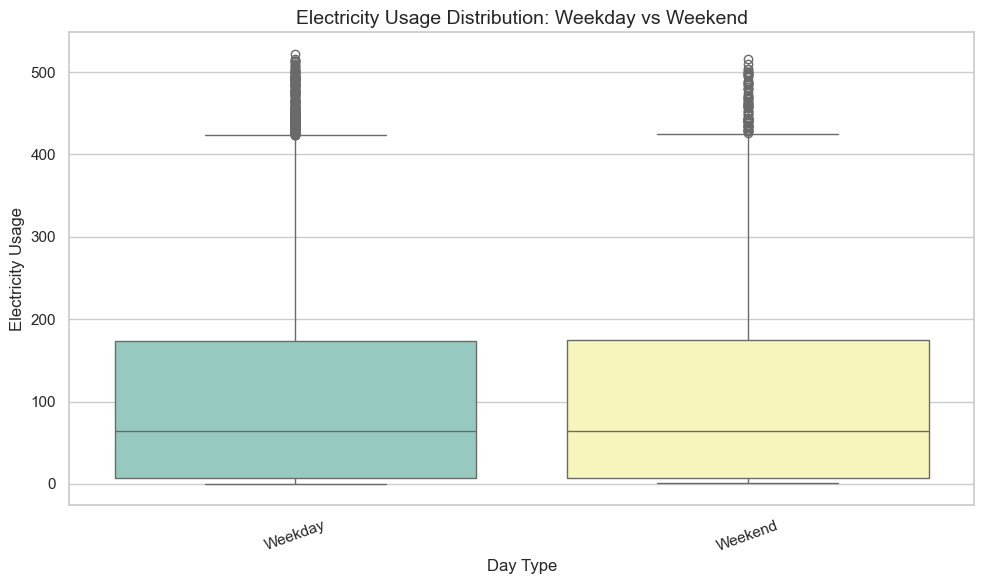

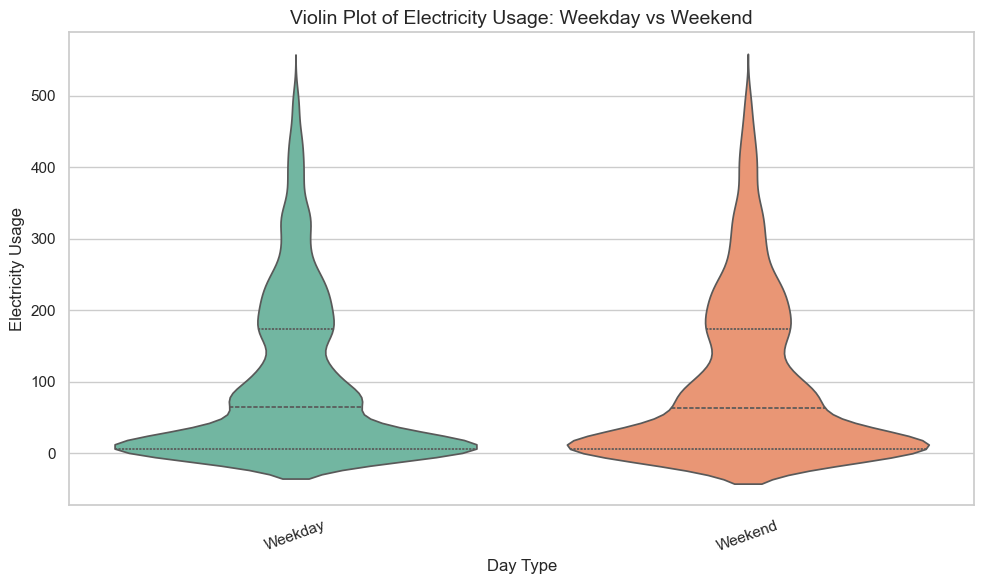

In [5]:
# test-2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('long_data_.csv')

# Convert Dates column to datetime
df['Dates'] = pd.to_datetime(df['Dates'], format="%d/%m/%Y %H:%M:%S")

# Step 1: Create Day_Type column (Weekday/Weekend)
df['Day_Type'] = df['Dates'].dt.weekday.map(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Step 2: Group Usage values by Day_Type
daytype_groups = df.groupby('Day_Type')['Usage'].apply(list)

# Step 3: Perform two-sample t-test (Welch's t-test)
t_stat, p_value = stats.ttest_ind(
    daytype_groups['Weekday'],
    daytype_groups['Weekend'],
    equal_var=False,
    nan_policy='omit'
)

# Step 4: Output results
print("T-Test Result (Weekday vs Weekend):")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 5: Additional Statistics
# Optional: Descriptive statistics
# print("\nDescriptive Statistics by Day Type:")
# print(df.groupby('Day_Type')['Usage'].describe())

# Step 6: Visualization
sns.set(style="whitegrid")

# Boxplot to show distribution of usage by Day_Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Day_Type', y='Usage', palette='Set3')
plt.title('Electricity Usage Distribution: Weekday vs Weekend', fontsize=14)
plt.ylabel('Electricity Usage')
plt.xlabel('Day Type')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Violin plot for detailed distribution view
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Day_Type', y='Usage', palette='Set2', inner='quartile')
plt.title('Violin Plot of Electricity Usage: Weekday vs Weekend', fontsize=14)
plt.ylabel('Electricity Usage')
plt.xlabel('Day Type')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


### Test Output:
- **T-statistic**: -0.0068
- **p-value**: 0.9945 

### Conclusion:
- If *p-value < 0.05*: Reject the null hypothesis ⇒ electricity usage is same on the weekday and weekend.
- If *p-value ≥ 0.05*: Fail to reject the null hypothesis ⇒ No statistically significant difference found between weekday and weekend usage
  
**Since our p-value is very high compared to 0.05 we fail to reject the null hypothesis. There is no significant difference in weekday and weekend usage**

--------